# Tax Day Strategy

In [1]:
import datetime as dt
import pandas as pd
import sys

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
sys.setrecursionlimit(100_000)

import available as avb
import constants
import utils as self_utils
from quantified_strategies import utils


C:\Users\tomw1\AppData\Local\Temp\ipykernel_2268\3468054645.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


May need to change to fit other strategy


In [2]:
constants.SPLIT

False

In [3]:
constants.START

{'day': 31, 'month': 3}

In [4]:
constants.END

{'day': 15, 'month': 4}

In [5]:
constants.START_DATE

datetime.date(2000, 1, 1)

In [6]:
constants.END_DATE

datetime.date(2024, 2, 17)

In [7]:
START = dt.date(2015, 1, 1)
END = dt.date.today()

In [8]:
dt.date(year=2015, month=1, day=1)

datetime.date(2015, 1, 1)

## Rules

1. Buy at the close of the last trading day in March;
2. Sell at the close on the first trading day after calendar day 15 in April.

In [9]:
TICKERS = [
    'XLC', 
    'XLY', 
    'XLP', 
    'XLE', 
    'XLF', 
    'XLV', 
    'XLI', 
    'XLB', 
    'XLRE', 
    'XLK', 
    'XLU', 
    'SPY',
]

# Run Strategy for Individual Ticker

In [10]:
TICKER = "XLB"

In [11]:
df1 = self_utils.run(ticker=TICKER, start=START, end=END, full=True, enter_after=constants.START, exit_after=constants.END)
df1

,asset,ret,ret_shifted,active,strat_ret,cum_strat_ret,cum_hodl_ret,enter_flag,trade_number
Date,,,,,,,,,
2015-01-02,40.489025,NaN,-0.025488,False,-0.0,0.000000,-2.548843e-02,False,0
2015-01-05,39.457024,-0.025488,-0.008859,False,-0.0,0.000000,-3.412121e-02,False,0
2015-01-06,39.107491,-0.008859,0.011279,False,0.0,0.000000,-2.322753e-02,False,0
2015-01-07,39.548565,0.011279,0.023780,False,0.0,0.000000,2.220446e-16,False,0
2015-01-08,40.489025,0.023780,-0.005139,False,-0.0,0.000000,-5.138989e-03,False,0
...,...,...,...,...,...,...,...,...,...
2024-02-12,83.800003,0.007938,-0.014081,False,-0.0,0.282256,1.040553e+00,False,9
2024-02-13,82.620003,-0.014081,0.006415,False,0.0,0.282256,1.053643e+00,False,9
2024-02-14,83.150002,0.006415,0.018882,False,0.0,0.282256,1.092419e+00,False,9


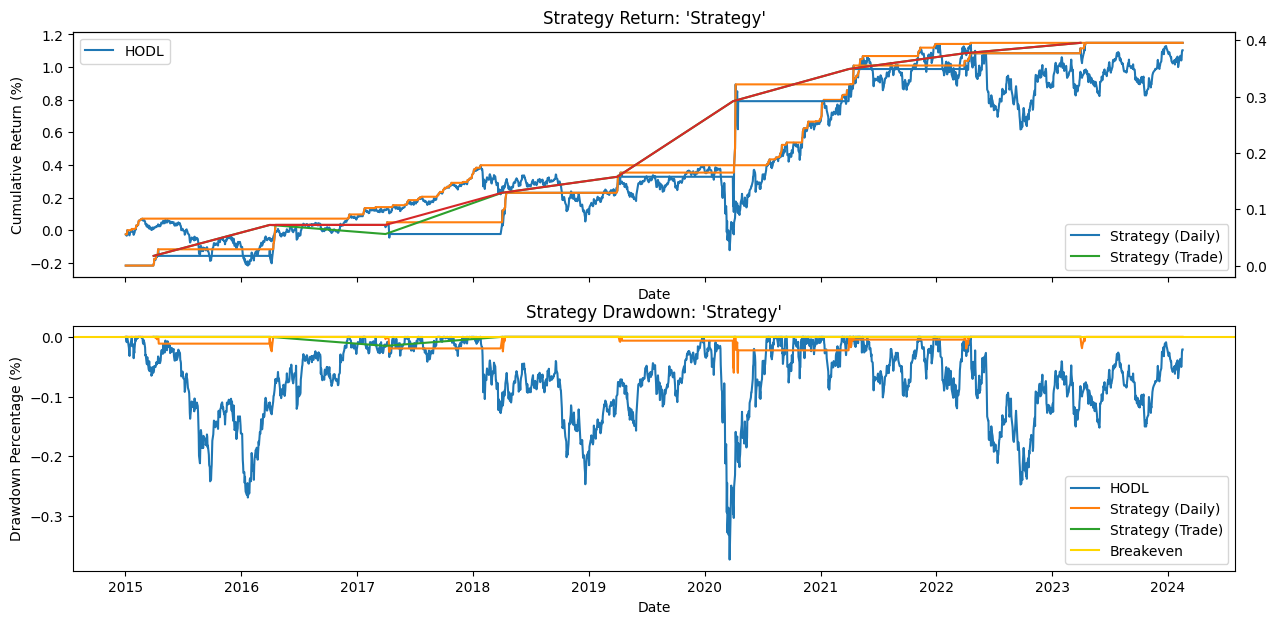

,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLB,XLB,XLB
Start,2015-01-02,2015-01-02,2015-03-31
End,2024-02-16,2024-02-16,2023-03-31
Mean Return,0.04129%,0.32584%,3.83189%
Total Return,110.35%,39.53%,39.53%
Median Return,0.06554%,0.31215%,2.52085%
1st Quartile,-0.64310%,-0.26615%,1.53050%
3rd Quartile,0.74691%,0.96562%,6.16531%
Std Dev Return,1.33356%,1.50442%,3.81706%
CAGR,3.238 bps,31.474 bps,377.051 bps


In [12]:
strategy_statistics = self_utils.run2(ticker=TICKER, split=constants.SPLIT, do_plot=True, start=START, end=END)
strategy_statistics

In [13]:
self_utils.get_statistic(stat_df=strategy_statistics, stat="Total Return")

,HODL,Strategy (Daily),Strategy (Trade)
Total Return,110.35%,39.53%,39.53%


In [14]:
details = self_utils.get_strategy_returns(ticker=TICKER, start=START, end=END)
details.keys()

dict_keys(['returns', 'pos', 'trade_returns', 'hodl'])

In [15]:
returns = details["returns"].copy()
positions = details["pos"].copy()
hodl_returns = details["hodl"].copy()


In [24]:
df2 = pd.concat([df1.loc[df1["active"], "strat_ret"], returns[positions != 0.0]], axis=1)
# df2["diff"] = df2.diff(axis=1).dropna(how="all", axis=1)
df2

,strat_ret,0
Date,,
2015-03-31,0.002870,0.002870
2015-04-01,0.001022,0.001022
2015-04-02,0.007964,0.007964
2015-04-06,-0.001621,-0.001621
2015-04-07,0.002841,0.002841
2015-04-08,0.002833,0.002833
2015-04-09,0.002825,0.002825
2015-04-10,-0.004024,-0.004024
2015-04-13,0.004243,0.004243


In [14]:
def earlier_positions(pos: pd.Series, n: int = 1) -> pd.Series:
    return ((positions.shift(-n) + positions) > 0).astype(int)

def later_positions(pos: pd.Series, n: int = 1) -> pd.Series:
    return earlier_positions(pos=pos, n=-n)

In [15]:
def earlier_returns(hodl: pd.Series, pos: pd.Series, ticker: str, n: int = 1) -> pd.Series:
    new_pos = earlier_positions(pos=pos, n=n)
    new_rets = new_pos * hodl
    return utils.describe(returns=new_rets, pos=new_pos, daily=True, asset=ticker)

def later_returns(hodl: pd.Series, pos: pd.Series, ticker: str, n: int = 1) -> pd.Series:
    new_pos = later_positions(pos=pos, n=n)
    new_rets = new_pos * hodl
    return utils.describe(returns=new_rets, pos=new_pos, daily=True, asset=ticker)


In [16]:
df_earlier = pd.concat([earlier_returns(hodl=hodl_returns, pos=positions, ticker=TICKER, n=n) for n in range(0, 100)], axis=1)
df_later = pd.concat([later_returns(hodl=hodl_returns, pos=positions, ticker=TICKER, n=n) for n in range(1, 100)], axis=1)

In [17]:
statistic = "Trade CAGR"

df_mean = pd.concat([
    pd.Series(df_later.loc[statistic].str.split("%", expand=True)[0].astype(float).values, index=[*range(1, df_later.shape[1]+1, 1)]),
    pd.Series(df_earlier.loc[statistic].str.split("%", expand=True)[0].astype(float).values, index=[*range(0, -df_earlier.shape[1], -1)]),
], axis=0).sort_index()

In [18]:
import matplotlib.pyplot as plt

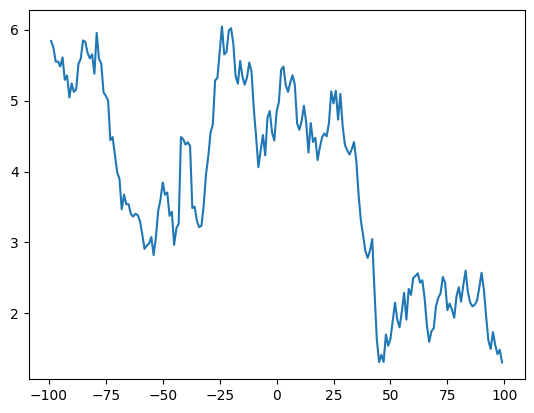

In [19]:
fig, ax = plt.subplots()
ax.plot(df_mean)
plt.show()

# Run Strategy for ALL Tickers Individually

## Calculate Returns

In [20]:
strategy_details = dict()
for ticker in TICKERS:
    print(ticker, end="...")
    details = utils.get_strategy_returns(ticker=ticker, start=START, end=END)
    strategy_details[ticker] = details
    print("Completed!")

XLC...Completed!
XLY...Completed!
XLP...Completed!
XLE...Completed!
XLF...Completed!
XLV...Completed!
XLI...Completed!
XLB...Completed!
XLRE...Completed!
XLK...Completed!
XLU...Completed!
SPY...Completed!


## Plot Returns for HODL, Strategy (Daily Returns) and Strategy (Trade Returns)

ticker = 'XLC'


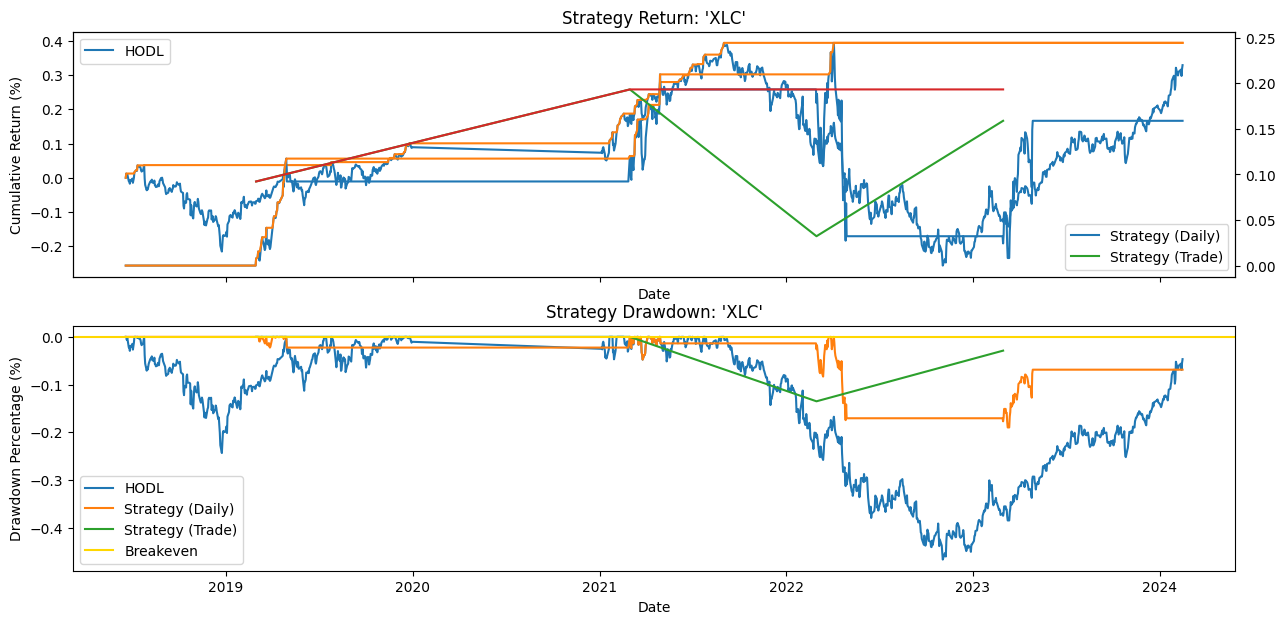


ticker = 'XLY'


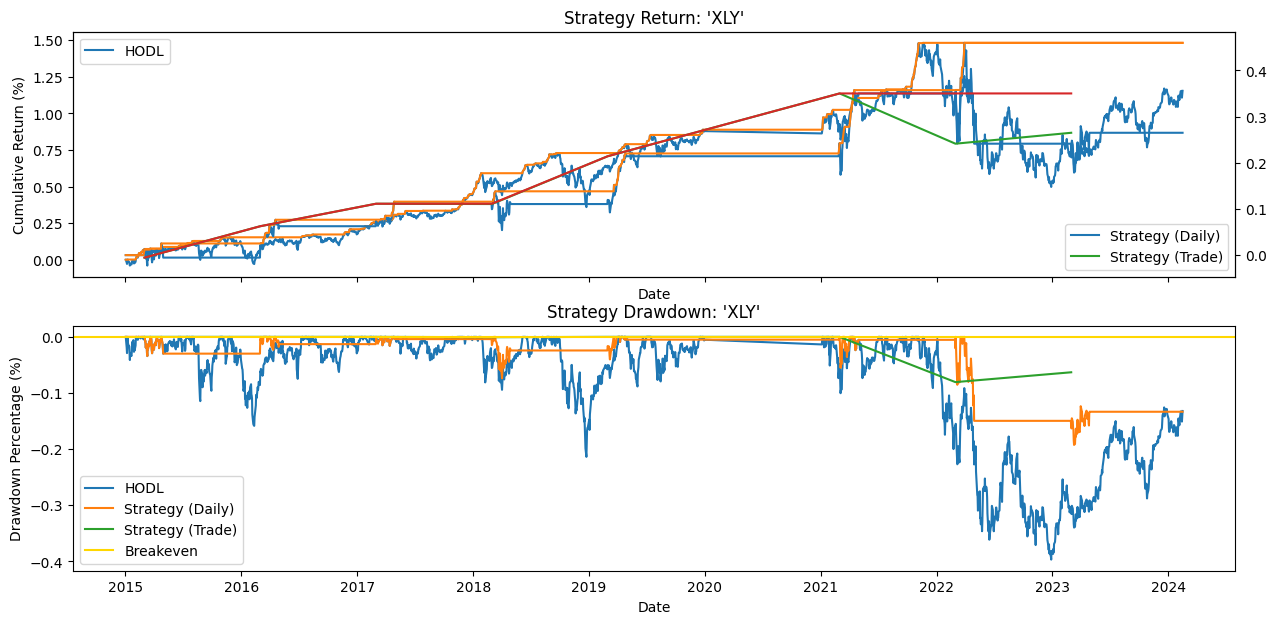


ticker = 'XLP'


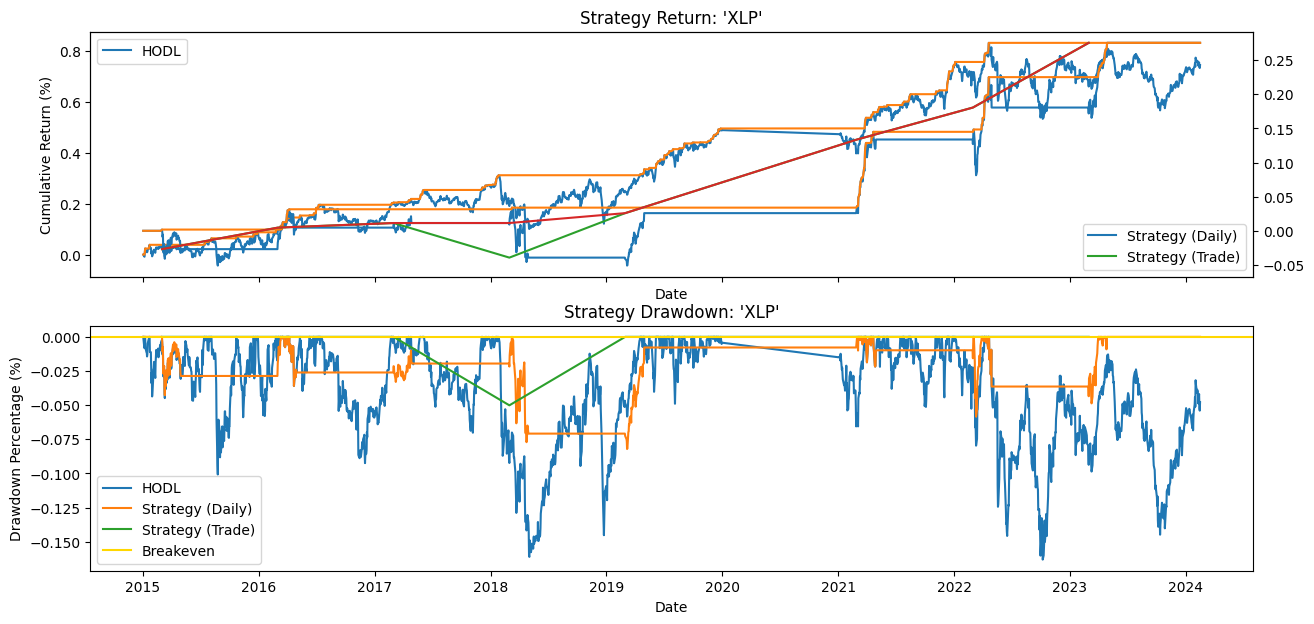


ticker = 'XLE'


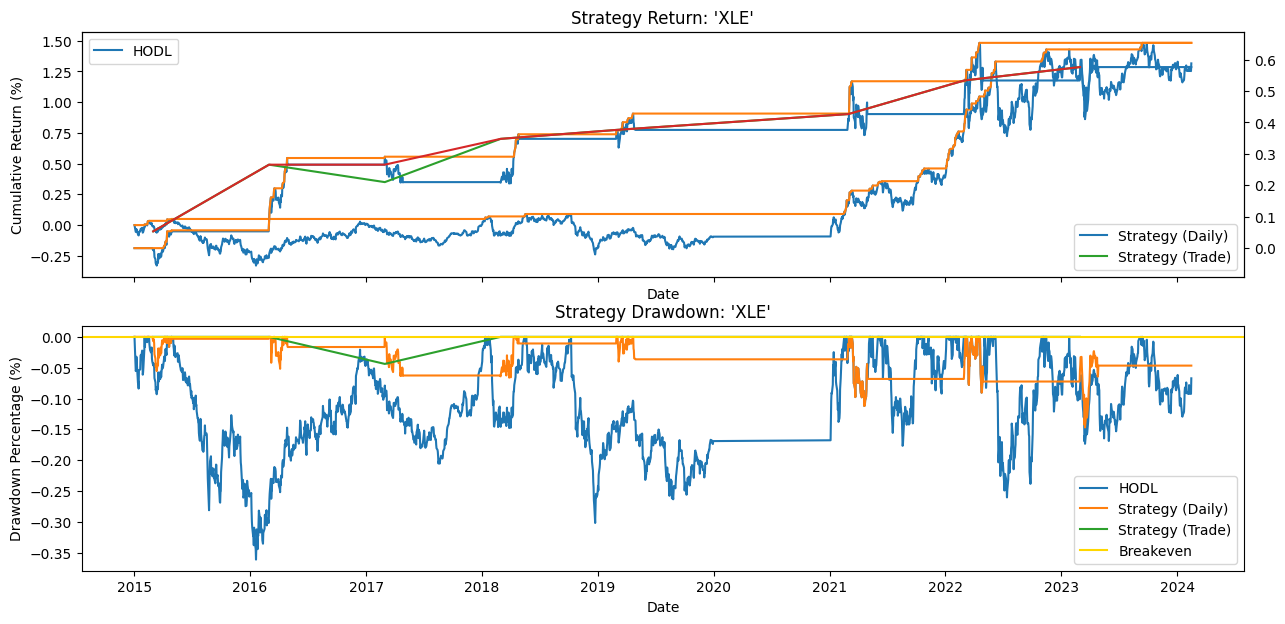


ticker = 'XLF'


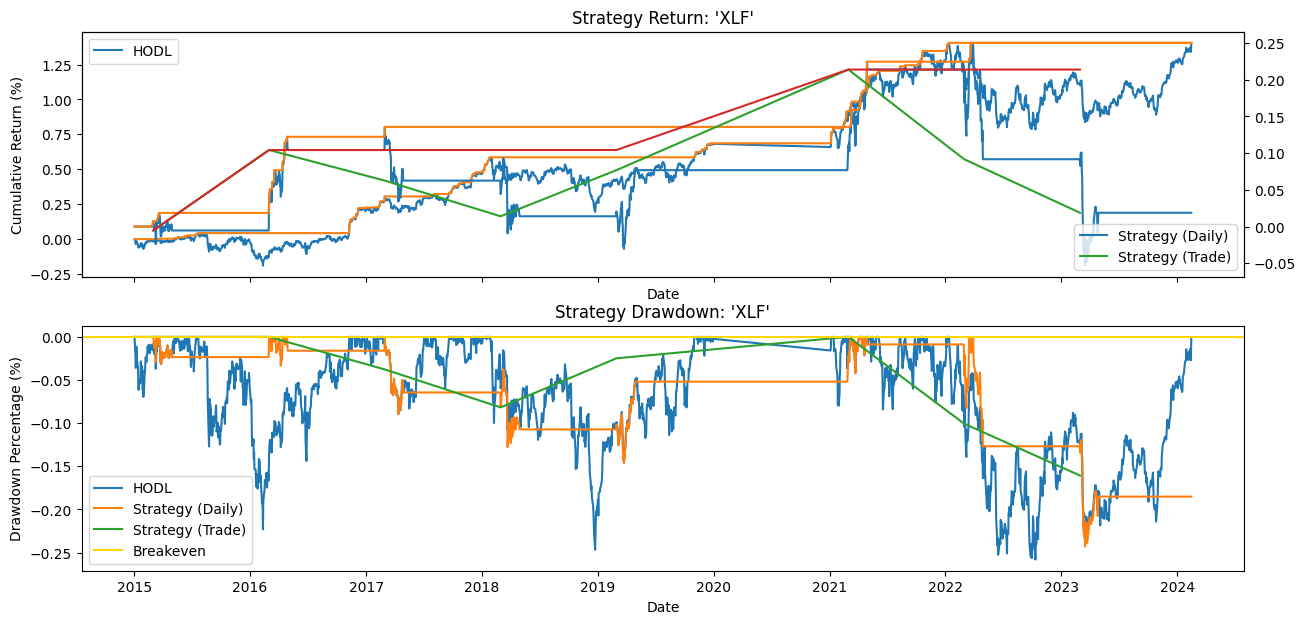


ticker = 'XLV'


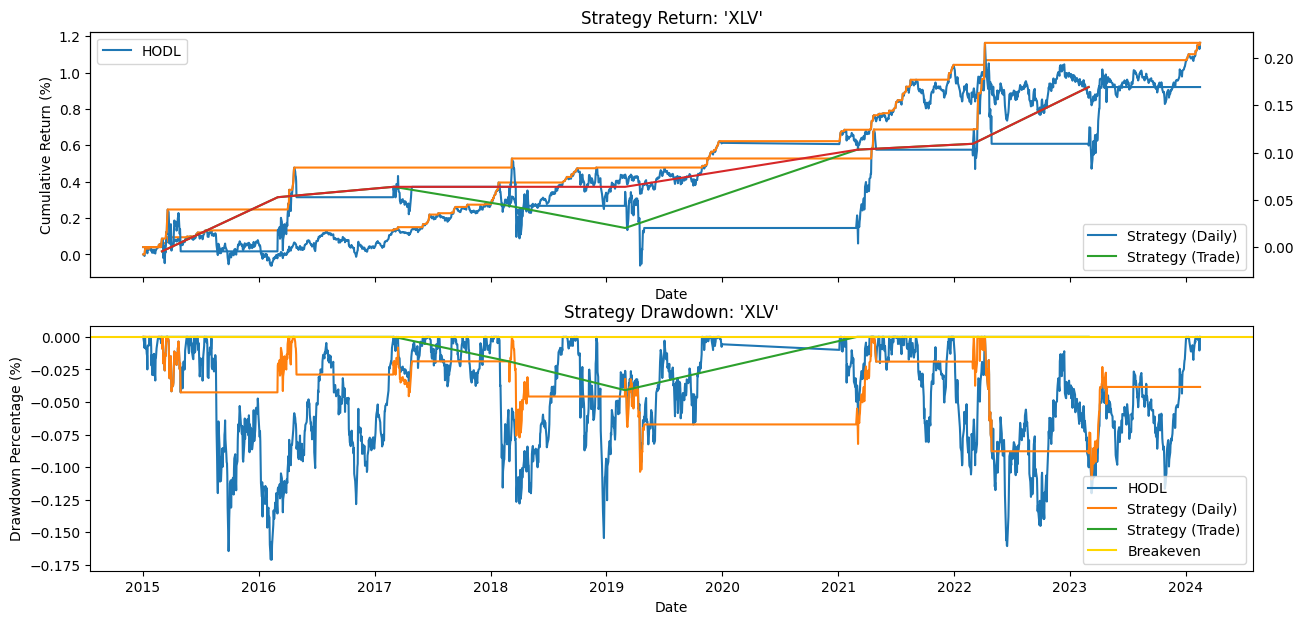


ticker = 'XLI'


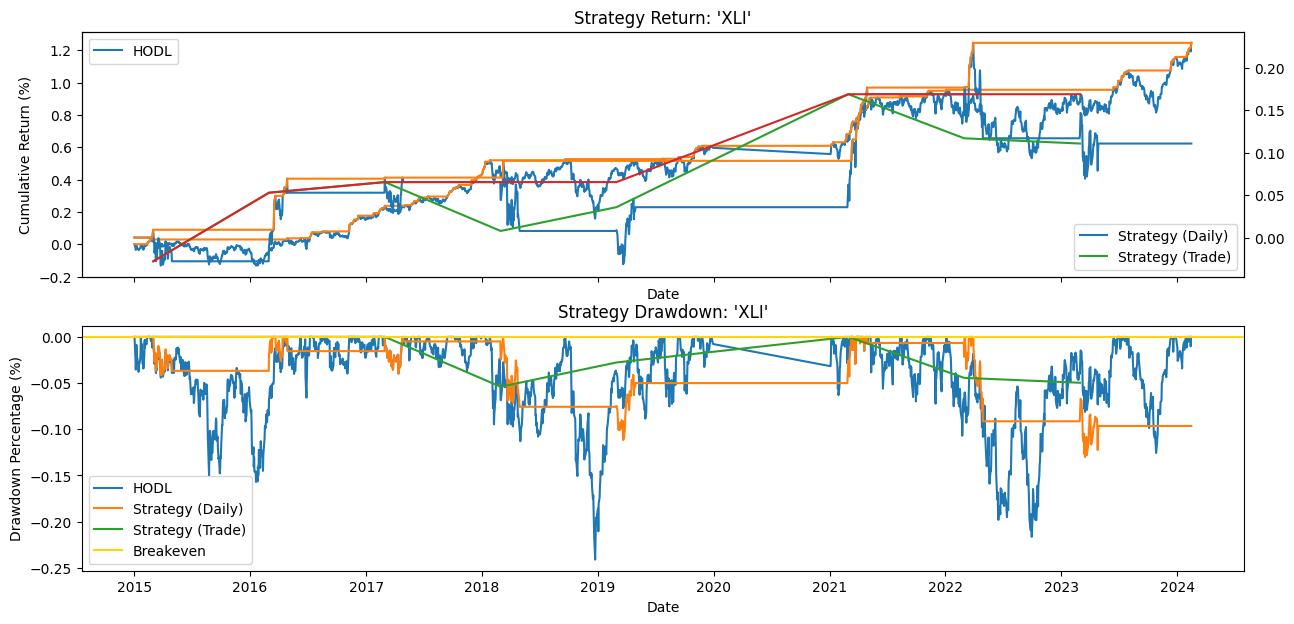


ticker = 'XLB'


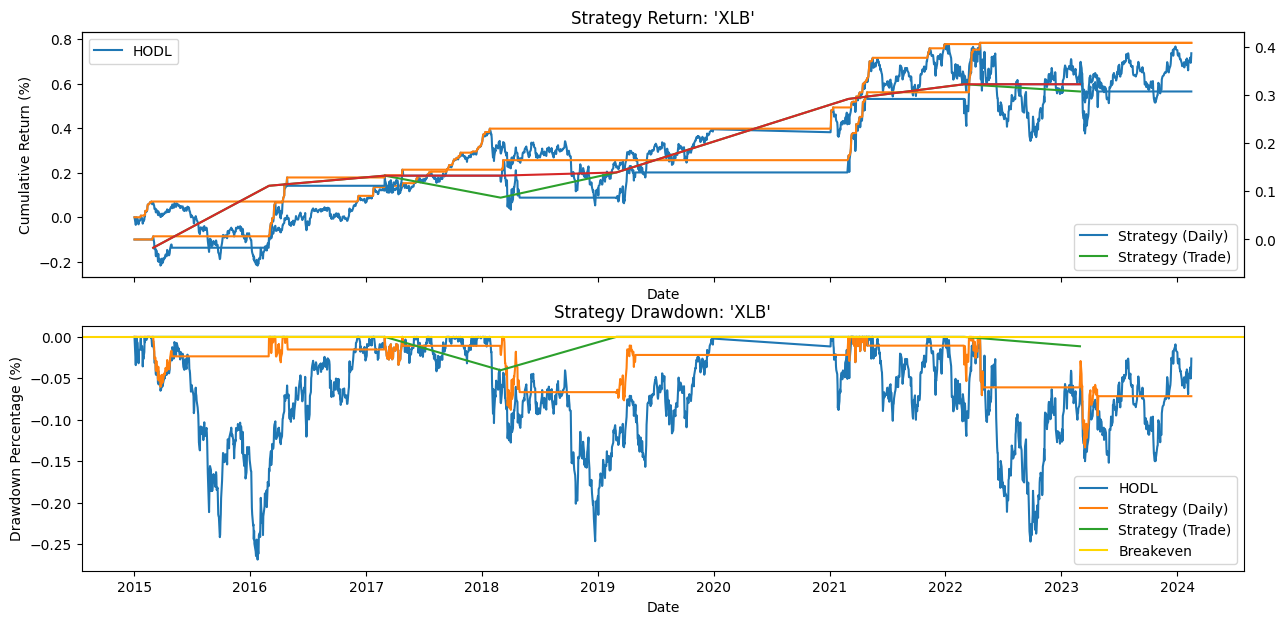


ticker = 'XLRE'


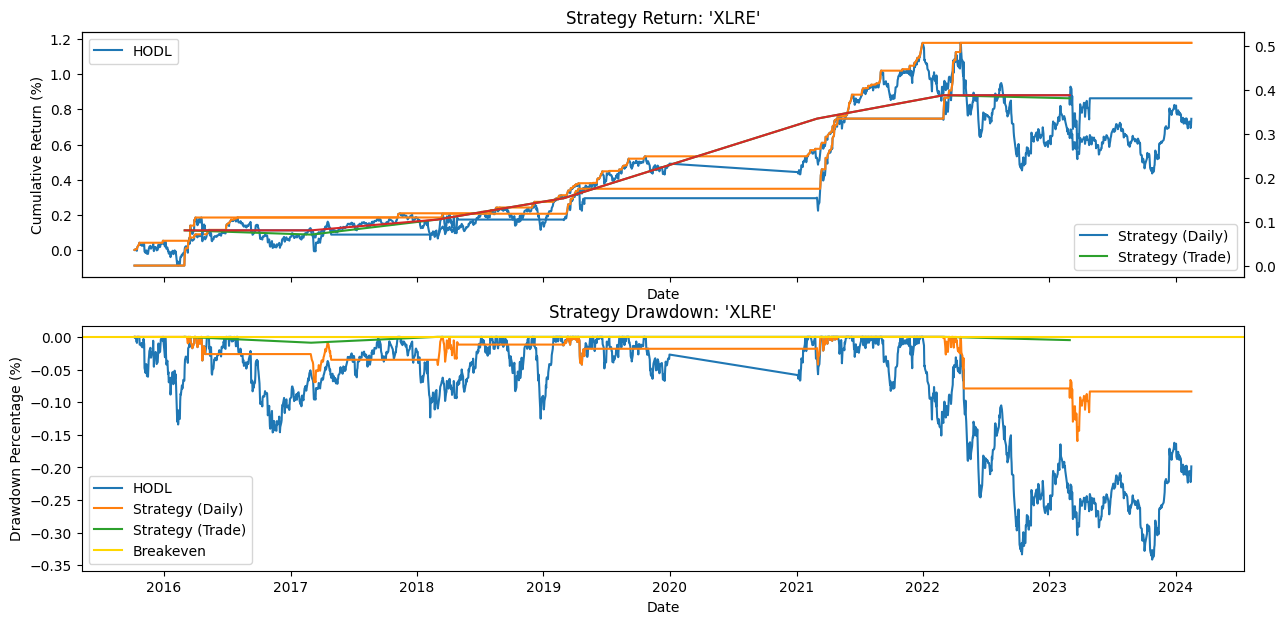


ticker = 'XLK'


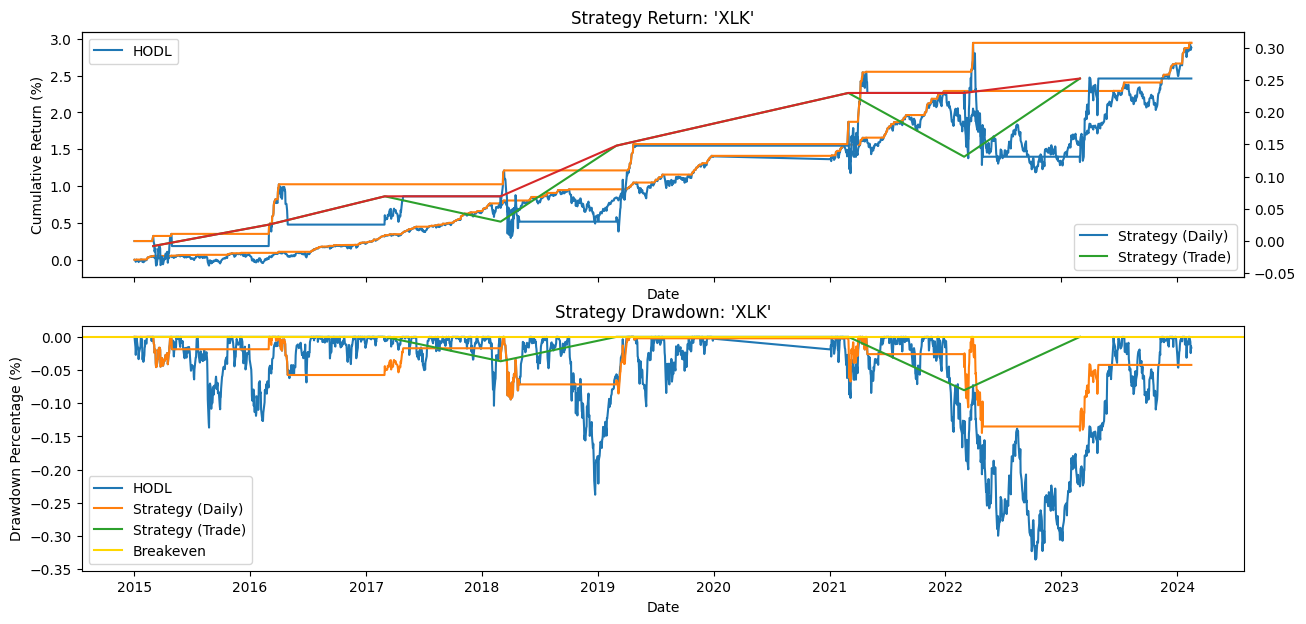


ticker = 'XLU'


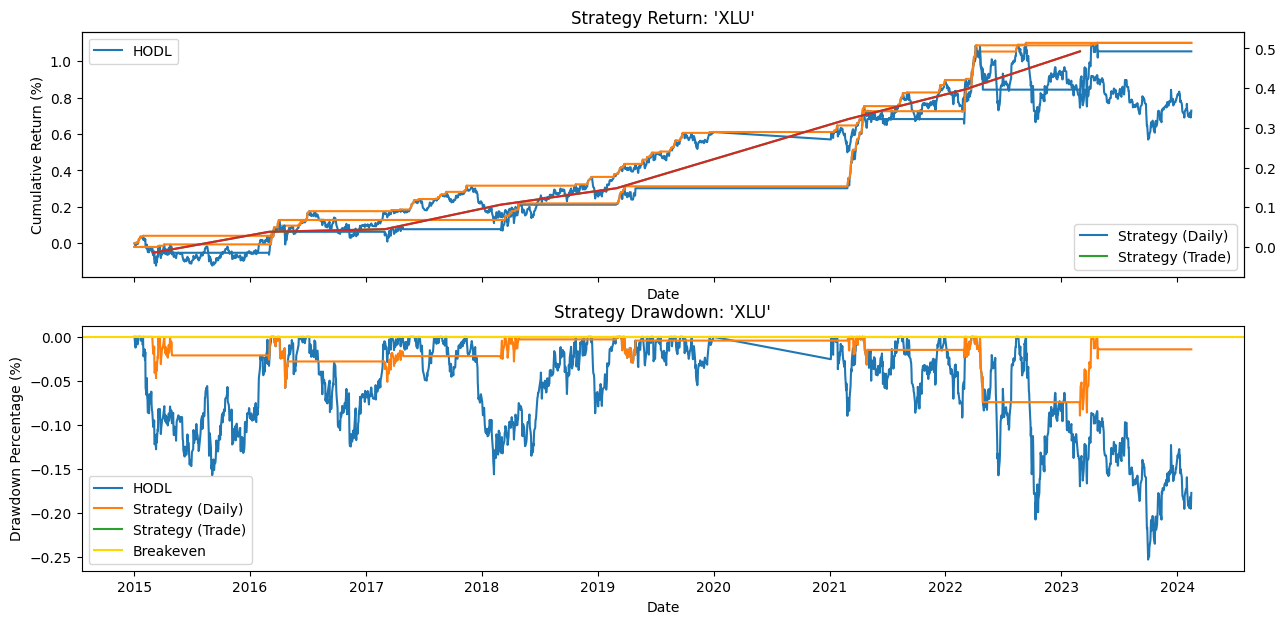


ticker = 'SPY'


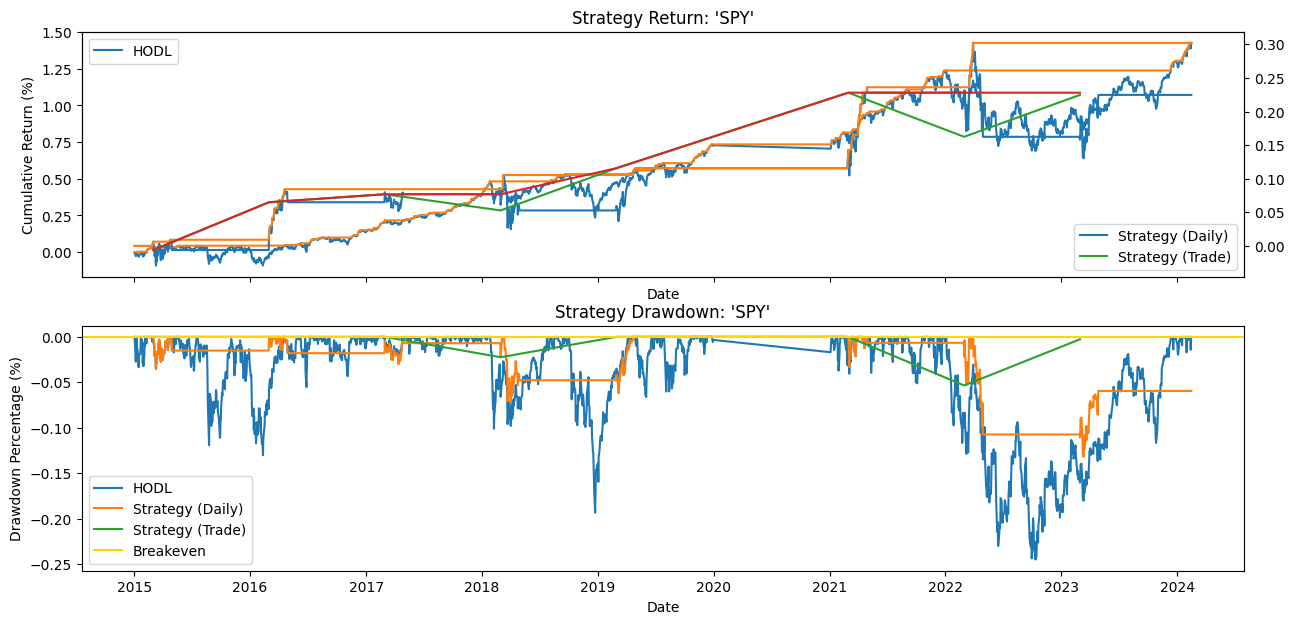

In [21]:
for ticker, details in strategy_details.items():
    print(f"{ticker = !r}")
    utils.plot(asset=ticker, **{"HODL": details["hodl"], "Strategy (Daily)": details["returns"], "Strategy (Trade)": details["trade_returns"]})
    print()

## Describe Returns for HODL, Strategy (Daily Returns) and Strategy (Trade Returns)

In [22]:
descriptions = dict()
for ticker, details in strategy_details.items():
    print(f"{ticker = !r}")
    try:
        description = utils.run(ticker=ticker, split=constants.SPLIT, details=details, do_plot=False, start=START, end=END)
        display(description)
        descriptions[ticker] = description
    except Exception as e:
        print(f"Exception Raised Running: {e}")
    print("=========================================================================")

all_stock_descriptions = utils.combine_descriptions(**descriptions)

ticker = 'XLC'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLC,XLC,XLC
Start,2018-06-19,2018-06-19,2019-03-01
End,2024-02-15,2024-02-15,2023-03-01
Mean Return,0.03359%,0.09633%,4.31163%
Total Return,32.89%,15.89%,15.89%
Median Return,0.07273%,0.06109%,9.23824%
1st Quartile,-0.69773%,-0.76636%,-2.13448%
3rd Quartile,0.77238%,0.90623%,10.75774%
Std Dev Return,1.36553%,1.42530%,11.95920%
CAGR,2.426 bps,8.626 bps,375.468 bps


ticker = 'XLY'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLY,XLY,XLY
Start,2015-01-02,2015-01-02,2015-03-02
End,2024-02-15,2024-02-15,2023-03-01
Mean Return,0.04505%,0.07641%,3.14812%
Total Return,115.45%,26.50%,26.50%
Median Return,0.11328%,0.12433%,3.24416%
1st Quartile,-0.52966%,-0.52183%,-0.29899%
3rd Quartile,0.67907%,0.70946%,8.07532%
Std Dev Return,1.22134%,1.22179%,6.20630%
CAGR,3.758 bps,6.895 bps,298.155 bps


ticker = 'XLP'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLP,XLP,XLP
Start,2015-01-02,2015-01-02,2015-03-02
End,2024-02-15,2024-02-15,2023-03-01
Mean Return,0.03039%,0.07408%,3.20832%
Total Return,74.44%,27.53%,27.53%
Median Return,0.04252%,0.08632%,3.68328%
1st Quartile,-0.38179%,-0.33416%,-1.00753%
3rd Quartile,0.48947%,0.53600%,7.40558%
Std Dev Return,0.79300%,0.73985%,5.33187%
CAGR,2.724 bps,7.135 bps,308.672 bps


ticker = 'XLE'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLE,XLE,XLE
Start,2015-01-02,2015-01-02,2015-03-02
End,2024-02-15,2024-02-15,2023-03-01
Mean Return,0.05321%,0.14460%,6.06724%
Total Return,131.59%,57.64%,57.64%
Median Return,0.04585%,0.05914%,4.50316%
1st Quartile,-0.79558%,-0.71620%,2.44743%
3rd Quartile,0.91079%,1.13971%,9.43707%
Std Dev Return,1.55505%,1.48800%,7.27731%
CAGR,4.111 bps,13.356 bps,585.398 bps


ticker = 'XLF'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLF,XLF,XLF
Start,2015-01-02,2015-01-02,2015-03-02
End,2024-02-15,2024-02-15,2023-03-01
Mean Return,0.04947%,0.01305%,0.53967%
Total Return,140.24%,1.88%,1.88%
Median Return,0.05592%,0.00000%,-2.15382%
1st Quartile,-0.53763%,-0.63399%,-5.62524%
3rd Quartile,0.70512%,0.72522%,8.60620%
Std Dev Return,1.14501%,1.23180%,8.45595%
CAGR,4.291 bps,0.546 bps,23.305 bps


ticker = 'XLV'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLV,XLV,XLV
Start,2015-01-02,2015-01-02,2015-03-02
End,2024-02-15,2024-02-15,2023-03-01
Mean Return,0.04210%,0.05044%,2.03765%
Total Return,116.32%,16.92%,16.92%
Median Return,0.08416%,0.06711%,0.80587%
1st Quartile,-0.44130%,-0.41670%,-1.17345%
3rd Quartile,0.57999%,0.67399%,5.58197%
Std Dev Return,0.92952%,0.95726%,3.87833%
CAGR,3.777 bps,4.586 bps,197.373 bps


ticker = 'XLI'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLI,XLI,XLI
Start,2015-01-02,2015-01-02,2015-03-02
End,2024-02-15,2024-02-15,2023-03-01
Mean Return,0.04480%,0.03572%,1.49047%
Total Return,124.56%,11.07%,11.07%
Median Return,0.08563%,0.07336%,0.31623%
1st Quartile,-0.48445%,-0.45872%,-3.61454%
3rd Quartile,0.62760%,0.70643%,5.54041%
Std Dev Return,1.01842%,0.99349%,6.34830%
CAGR,3.961 bps,3.079 bps,132.093 bps


ticker = 'XLB'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLB,XLB,XLB
Start,2015-01-02,2015-01-02,2015-03-02
End,2024-02-15,2024-02-15,2023-03-01
Mean Return,0.03343%,0.08459%,3.58002%
Total Return,73.70%,30.69%,30.69%
Median Return,0.05948%,0.12473%,2.12595%
1st Quartile,-0.62304%,-0.53980%,-1.42191%
3rd Quartile,0.70793%,0.82207%,8.94050%
Std Dev Return,1.13119%,1.10107%,6.54705%
CAGR,2.703 bps,7.853 bps,340.279 bps


ticker = 'XLRE'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLRE,XLRE,XLRE
Start,2015-10-08,2015-10-08,2016-03-01
End,2024-02-15,2024-02-15,2023-03-01
Mean Return,0.03609%,0.11366%,4.83994%
Total Return,74.63%,38.03%,38.03%
Median Return,0.09150%,0.09125%,3.98697%
1st Quartile,-0.53097%,-0.41007%,-0.50082%
3rd Quartile,0.65618%,0.67133%,8.01229%
Std Dev Return,1.09127%,1.04345%,5.66798%
CAGR,3.014 bps,10.822 bps,471.240 bps


ticker = 'XLK'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLK,XLK,XLK
Start,2015-01-02,2015-01-02,2015-03-02
End,2024-02-15,2024-02-15,2023-03-01
Mean Return,0.07461%,0.07408%,3.05211%
Total Return,288.01%,25.20%,25.20%
Median Return,0.09388%,0.01545%,3.81453%
1st Quartile,-0.54479%,-0.53634%,-2.22702%
3rd Quartile,0.74590%,0.76773%,8.92286%
Std Dev Return,1.28249%,1.27946%,6.86940%
CAGR,6.639 bps,6.592 bps,284.878 bps


ticker = 'XLU'


C:\Users\tomw1\PycharmProjects\quantified_strategies\quantified_strategies\seasonal_trading\tax_day_strategy\utils.py:169: RuntimeWarning: divide by zero encountered in scalar divide
  calmar_ratio = tot_ret / drawdown_statistics["max_drawdown"]


,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLU,XLU,XLU
Start,2015-01-02,2015-01-02,2015-03-02
End,2024-02-15,2024-02-15,2023-03-01
Mean Return,0.03173%,0.12170%,5.23382%
Total Return,72.82%,49.27%,49.27%
Median Return,0.08549%,0.13848%,5.48410%
1st Quartile,-0.52199%,-0.38408%,2.18471%
3rd Quartile,0.61523%,0.70294%,6.40880%
Std Dev Return,0.99414%,0.91352%,4.93707%
CAGR,2.678 bps,11.753 bps,513.442 bps


ticker = 'SPY'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,SPY,SPY,SPY
Start,2015-01-02,2015-01-02,2015-03-02
End,2024-02-15,2024-02-15,2023-03-01
Mean Return,0.04792%,0.06381%,2.68527%
Total Return,142.69%,22.47%,22.47%
Median Return,0.05035%,0.06374%,3.24168%
1st Quartile,-0.36412%,-0.39559%,-1.42053%
3rd Quartile,0.54529%,0.59094%,6.55824%
Std Dev Return,0.94932%,0.93341%,5.27068%
CAGR,4.341 bps,5.946 bps,256.622 bps


## Portfolio Returns

In [23]:
all_hodl_returns = pd.concat([details["hodl"].to_frame(name=ticker) for ticker, details in strategy_details.items()], axis=1)
all_hodl_returns = all_hodl_returns.sort_index()
all_hodl_returns = all_hodl_returns.fillna(0.0)
all_hodl_returns.head(5)

,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,SPY
Date,,,,,,,,,,,,
2015-01-02,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2015-01-05,0.0,-0.019126,-0.007032,-0.041368,-0.021027,-0.005100,-0.023358,-0.025488,0.0,-0.015265,-0.012226,-0.018060
2015-01-06,0.0,-0.009963,-0.001250,-0.014690,-0.015283,-0.003368,-0.012321,-0.008859,0.0,-0.012057,0.000640,-0.009419
2015-01-07,0.0,0.015814,0.017101,0.002130,0.010487,0.023512,0.007522,0.011279,0.0,0.008468,0.009810,0.012461
2015-01-08,0.0,0.015001,0.015173,0.022449,0.014944,0.017085,0.020029,0.023779,0.0,0.021980,0.006970,0.017745


In [24]:
all_returns = pd.concat([details["returns"].to_frame(name=ticker) for ticker, details in strategy_details.items()], axis=1)
all_returns = all_returns.sort_index()
all_returns = all_returns.fillna(0.0)
all_returns

,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,SPY
Date,,,,,,,,,,,,
2015-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-05,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0
2015-01-06,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0
2015-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-09,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-02-12,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0
2024-02-13,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [25]:
all_positions = pd.concat([details["pos"].to_frame(name=ticker) for ticker, details in strategy_details.items()], axis=1)
all_positions = all_positions.sort_index()
all_positions = all_positions.fillna(0.0)
all_positions

,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,SPY
2015-01-02,0.0,0,0,0,0,0,0,0,0.0,0,0,0
2015-01-05,0.0,0,0,0,0,0,0,0,0.0,0,0,0
2015-01-06,0.0,0,0,0,0,0,0,0,0.0,0,0,0
2015-01-07,0.0,0,0,0,0,0,0,0,0.0,0,0,0
2015-01-08,0.0,0,0,0,0,0,0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-09,0.0,0,0,0,0,0,0,0,0.0,0,0,0
2024-02-12,0.0,0,0,0,0,0,0,0,0.0,0,0,0
2024-02-13,0.0,0,0,0,0,0,0,0,0.0,0,0,0
2024-02-14,0.0,0,0,0,0,0,0,0,0.0,0,0,0


### Equal-Weighted

In [26]:
equal_weighted_positions = all_positions.fillna(0.0).div(all_positions.sum(axis=1) + 1e-5, axis=0)
equal_weighted_position_sum = equal_weighted_positions.sum(axis=1)
equal_weighted_positions.head(5)

,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,SPY
2015-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
equal_weighted_returns = (all_hodl_returns * equal_weighted_positions).sum(axis=1)
equal_weighted_returns.head(5)

Date
2015-01-02    0.0
2015-01-05    0.0
2015-01-06    0.0
2015-01-07    0.0
2015-01-08    0.0
dtype: float64

In [28]:
train_dates = utils.get_training(all_hodl_returns.mean(axis=1)).index.tolist()
valid_dates = utils.get_validation(all_hodl_returns.mean(axis=1)).index.tolist()
test_dates = utils.get_test(all_hodl_returns.mean(axis=1)).index.tolist()

if constants.SPLIT:
    equal_weighted_description = pd.concat([
        utils.describe_split(returns=all_hodl_returns.mean(axis=1), daily=True, asset="Equally-weighted").to_frame(name="HODL"),
        utils.describe_split(returns=all_hodl_returns["SPY"], daily=True, asset="SPY").to_frame(name="Market"),
        utils.describe_split(
            returns=equal_weighted_returns, pos=equal_weighted_position_sum, daily=True, asset="Equally-weighted",
            train_dates=train_dates, valid_dates=valid_dates, test_dates=test_dates,
        ).to_frame(name="Strategy (Daily)"),
        utils.describe_split(
            returns=utils.get_trade_return(returns=equal_weighted_returns, pos=equal_weighted_position_sum), daily=False, asset="Equally-weighted",
            train_dates=train_dates, valid_dates=valid_dates, test_dates=test_dates,
        ).to_frame(name="Strategy (Trade)"),
    ], axis=1)
else:
    equal_weighted_description = pd.concat([
        utils.describe(returns=all_hodl_returns.mean(axis=1), daily=True, asset="Equally-weighted").to_frame(name="HODL"),
        utils.describe(returns=all_hodl_returns["SPY"], daily=True, asset="SPY").to_frame(name="Market"),
        utils.describe(
            returns=equal_weighted_returns, pos=equal_weighted_position_sum, daily=True, asset="Equally-weighted",
        ).to_frame(name="Strategy (Daily)"),
        utils.describe(
            returns=utils.get_trade_return(returns=equal_weighted_returns, pos=equal_weighted_position_sum), daily=False, asset="Equally-weighted",
        ).to_frame(name="Strategy (Trade)"),
    ], axis=1)
    
equal_weighted_description

,HODL,Market,Strategy (Daily),Strategy (Trade)
Asset,Equally-weighted,SPY,Equally-weighted,Equally-weighted
Start,2015-01-02,2015-01-02,2015-01-02,2015-03-02
End,2024-02-15,2024-02-15,2024-02-15,2023-03-01
Mean Return,0.04206%,0.04792%,0.07566%,3.21721%
Total Return,119.51%,142.69%,27.90%,27.90%
Median Return,0.05064%,0.05035%,0.06987%,2.15902%
1st Quartile,-0.32642%,-0.36412%,-0.34748%,-0.60085%
3rd Quartile,0.48061%,0.54529%,0.54323%,6.89170%
Std Dev Return,0.84404%,0.94932%,0.83230%,4.71547%
CAGR,3.849 bps,4.341 bps,7.220 bps,312.414 bps


In [29]:
utils.get_statistic(stat_df=equal_weighted_description, stat="Total Return")

,HODL,Market,Strategy (Daily),Strategy (Trade)
Total Return,119.51%,142.69%,27.90%,27.90%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


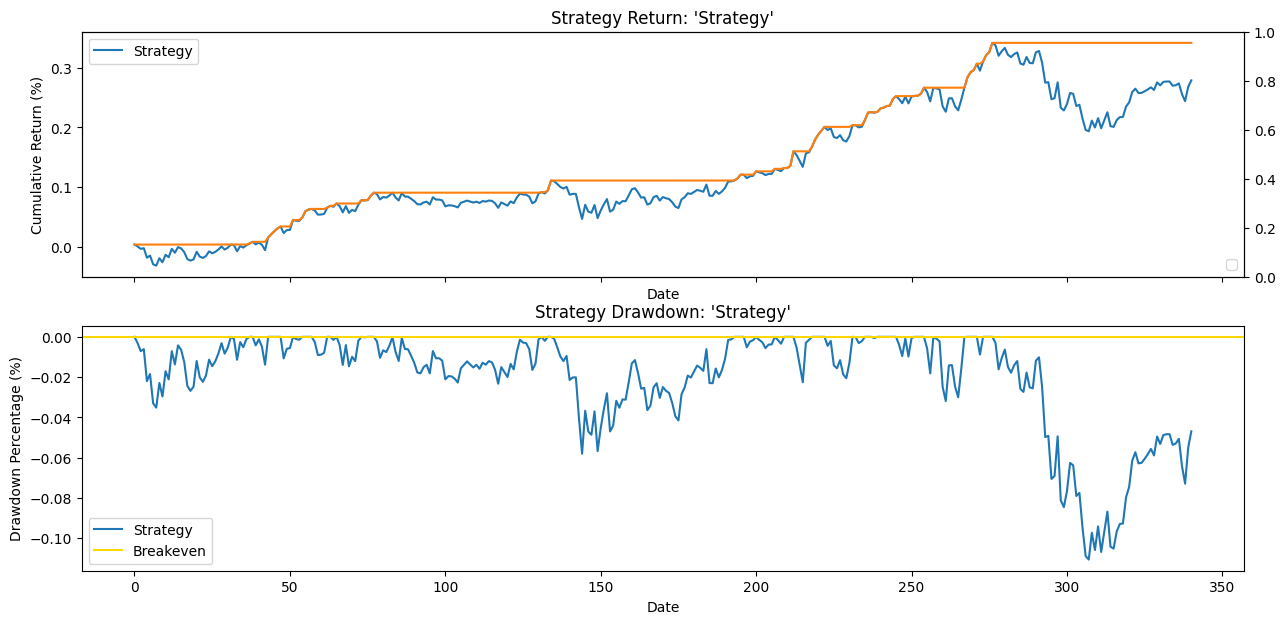

In [33]:
utils.plot(rets=equal_weighted_returns[equal_weighted_returns != 0.0], reset_index=True)

### Risk-Weighted

In [35]:
years = [year for year in range(all_returns.index[0].year, all_returns.index[-1].year)]

In [36]:
risk_weighted_positions = []

for i, year in enumerate(years):

    if i == 0:
        weights = all_positions.loc[all_positions.index.year == year].fillna(0.0).div(all_positions.loc[all_positions.index.year == year].sum(axis=1) + 1e-5, axis=0)
    else:
        positions_prev_years = all_positions.loc[all_positions.index.year < year]
        active_positions_prev_years = positions_prev_years.loc[positions_prev_years.sum(axis=1) != 0.0]
        active_tickers_prev_years = active_positions_prev_years.loc[:, active_positions_prev_years.sum(axis=0) != 0]
        strategy_returns_by_ticker_prev_years = all_returns.reindex(index=active_tickers_prev_years.index, columns=active_tickers_prev_years.columns)
        weights_by_ticker = (strategy_returns_by_ticker_prev_years.std() / strategy_returns_by_ticker_prev_years.std().sum()).to_dict()

        positions_this_year = all_positions.loc[all_positions.index.year == year]
        active_positions_this_year = positions_this_year.loc[positions_this_year.sum(axis=1) != 0.0]

        weights = pd.DataFrame(weights_by_ticker, index=active_positions_this_year.index)
        weights = weights.reindex(index=positions_this_year.index, columns=positions_this_year.columns, fill_value=0.0)
    
    risk_weighted_positions.append(weights)

risk_weighted_positions = pd.concat(risk_weighted_positions, axis=0)
risk_weighted_positions = risk_weighted_positions.reindex(index=all_hodl_returns.index).ffill()
risk_weighted_positions_sum = risk_weighted_positions.sum(axis=1)
risk_weighted_positions.head(5)

,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,SPY
Date,,,,,,,,,,,,
2015-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
risk_weighted_returns = (all_hodl_returns * risk_weighted_positions).sum(axis=1)
risk_weighted_returns.head(5)

Date
2015-01-02    0.0
2015-01-05    0.0
2015-01-06    0.0
2015-01-07    0.0
2015-01-08    0.0
dtype: float64

In [38]:
train_dates = utils.get_training(all_hodl_returns.mean(axis=1)).index.tolist()
valid_dates = utils.get_validation(all_hodl_returns.mean(axis=1)).index.tolist()
test_dates = utils.get_test(all_hodl_returns.mean(axis=1)).index.tolist()

if constants.SPLIT:
    risk_weighted_description = pd.concat([
        utils.describe_split(returns=all_hodl_returns.mean(axis=1), daily=True, asset="Equally-weighted").to_frame(name="HODL"),
        utils.describe_split(returns=all_hodl_returns["SPY"], daily=True, asset="SPY").to_frame(name="Market"),
        utils.describe_split(
            returns=risk_weighted_returns, pos=risk_weighted_positions_sum, daily=True, asset="Risk-weighted",
            train_dates=train_dates, valid_dates=valid_dates, test_dates=test_dates,
        ).to_frame(name="Strategy (Daily)"),
        utils.describe_split(
            returns=utils.get_trade_return(returns=risk_weighted_returns, pos=risk_weighted_positions_sum), daily=False, asset="Equally-weighted",
            train_dates=train_dates, valid_dates=valid_dates, test_dates=test_dates,
        ).to_frame(name="Strategy (Trade)"),
    ], axis=1)
else:
    risk_weighted_description = pd.concat([
        utils.describe(returns=all_hodl_returns.mean(axis=1), daily=True, asset="Equally-weighted").to_frame(name="HODL"),
        utils.describe(returns=all_hodl_returns["SPY"], daily=True, asset="SPY").to_frame(name="Market"),
        utils.describe(
            returns=risk_weighted_returns, pos=risk_weighted_positions_sum, daily=True, asset="Risk-weighted",
        ).to_frame(name="Strategy (Daily)"),
        utils.describe(
            returns=utils.get_trade_return(returns=risk_weighted_returns, pos=risk_weighted_positions_sum), daily=False, asset="Equally-weighted",
        ).to_frame(name="Strategy (Trade)"),
    ], axis=1)

risk_weighted_description

,HODL,Market,Strategy (Daily),Strategy (Trade)
Asset,Equally-weighted,SPY,Risk-weighted,Equally-weighted
Start,2015-01-02,2015-01-02,2015-01-02,2015-03-02
End,2024-02-15,2024-02-15,2024-02-15,2023-03-01
Mean Return,0.04206%,0.04792%,0.07597%,3.22228%
Total Return,119.51%,142.69%,28.00%,28.00%
Median Return,0.05064%,0.05035%,0.07990%,1.91725%
1st Quartile,-0.32642%,-0.36412%,-0.33091%,-0.30897%
3rd Quartile,0.48061%,0.54529%,0.57057%,6.80989%
Std Dev Return,0.84404%,0.94932%,0.84229%,4.59324%
CAGR,3.849 bps,4.341 bps,7.243 bps,313.412 bps


In [39]:
utils.get_statistic(stat_df=risk_weighted_description, stat="Mean Return")

,HODL,Market,Strategy (Daily),Strategy (Trade)
Mean Return,0.04206%,0.04792%,0.07597%,3.22228%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


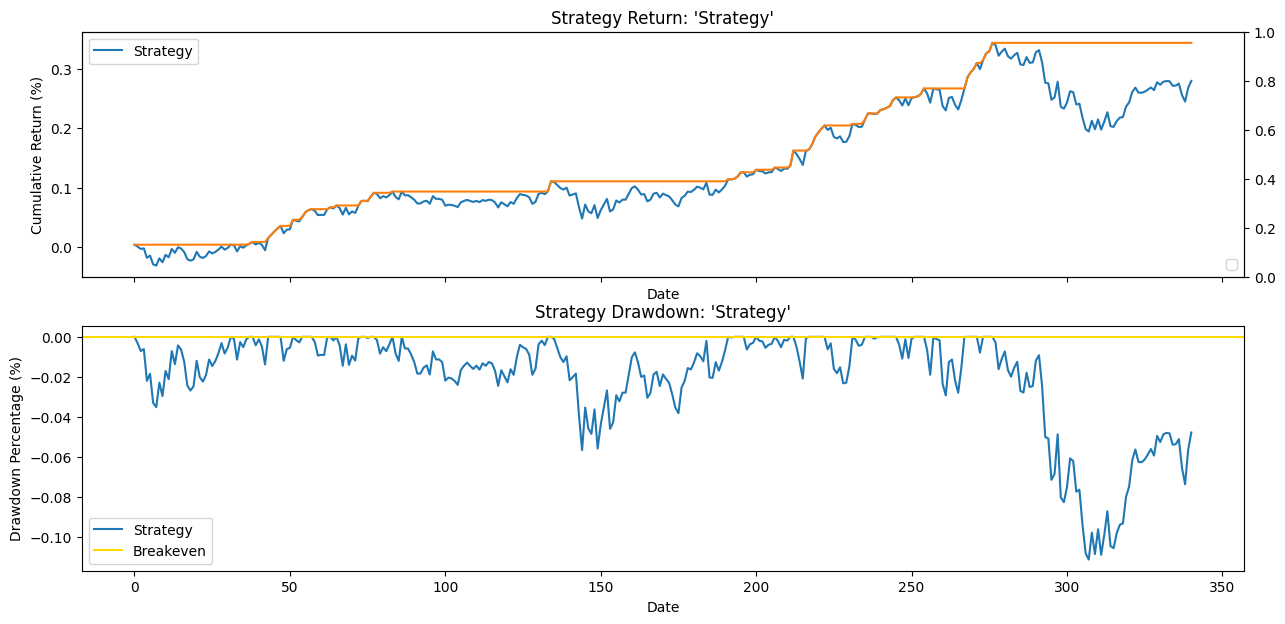

In [42]:
utils.plot(rets=risk_weighted_returns[risk_weighted_returns != 0.0], reset_index=True)

### Sharpe-Weighted

In [43]:
years = [year for year in range(all_returns.index[0].year, all_returns.index[-1].year)]

In [44]:
sharpe_weighted_positions = []

for i, year in enumerate(years):

    if i == 0:
        weights = all_positions.loc[all_positions.index.year == year].fillna(0.0).div(all_positions.loc[all_positions.index.year == year].sum(axis=1) + 1e-5, axis=0)
    else:
        positions_prev_years = all_positions.loc[all_positions.index.year < year]
        active_positions_prev_years = positions_prev_years.loc[positions_prev_years.sum(axis=1) != 0.0]
        active_tickers_prev_years = active_positions_prev_years.loc[:, active_positions_prev_years.sum(axis=0) != 0]
        strategy_returns_by_ticker_prev_years = all_returns.reindex(index=active_tickers_prev_years.index, columns=active_tickers_prev_years.columns)
        weights_by_ticker = ((strategy_returns_by_ticker_prev_years.mean() / strategy_returns_by_ticker_prev_years.std()) / (strategy_returns_by_ticker_prev_years.mean() / strategy_returns_by_ticker_prev_years.std()).sum()).to_dict()

        positions_this_year = all_positions.loc[all_positions.index.year == year]
        active_positions_this_year = positions_this_year.loc[positions_this_year.sum(axis=1) != 0.0]

        weights = pd.DataFrame(weights_by_ticker, index=active_positions_this_year.index)
        weights = weights.reindex(index=positions_this_year.index, columns=positions_this_year.columns, fill_value=0.0)
    
    sharpe_weighted_positions.append(weights)

sharpe_weighted_positions = pd.concat(sharpe_weighted_positions, axis=0)
sharpe_weighted_positions = sharpe_weighted_positions.reindex(index=all_hodl_returns.index).ffill()
sharpe_weighted_positions_sum = sharpe_weighted_positions.sum(axis=1)
sharpe_weighted_positions.head(5)

,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,SPY
Date,,,,,,,,,,,,
2015-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
sharpe_weighted_returns = (all_hodl_returns * sharpe_weighted_positions).sum(axis=1)
sharpe_weighted_returns.head(5)

Date
2015-01-02    0.0
2015-01-05    0.0
2015-01-06    0.0
2015-01-07    0.0
2015-01-08    0.0
dtype: float64

In [46]:
train_dates = utils.get_training(all_hodl_returns.mean(axis=1)).index.tolist()
valid_dates = utils.get_validation(all_hodl_returns.mean(axis=1)).index.tolist()
test_dates = utils.get_test(all_hodl_returns.mean(axis=1)).index.tolist()

if constants.SPLIT:
    sharpe_weighted_description = pd.concat([
        utils.describe_split(returns=all_hodl_returns.mean(axis=1), daily=True, asset="Equally-weighted").to_frame(name="HODL"),
        utils.describe_split(returns=all_hodl_returns["SPY"], daily=True, asset="SPY").to_frame(name="Market"),
        utils.describe_split(
            returns=sharpe_weighted_returns, pos=sharpe_weighted_positions_sum, daily=True, asset="Risk-weighted",
            train_dates=train_dates, valid_dates=valid_dates, test_dates=test_dates,
        ).to_frame(name="Strategy (Daily)"),
        utils.describe_split(
            returns=utils.get_trade_return(returns=sharpe_weighted_returns, pos=sharpe_weighted_positions_sum), daily=False, asset="Equally-weighted",
            train_dates=train_dates, valid_dates=valid_dates, test_dates=test_dates,
        ).to_frame(name="Strategy (Trade)"),
    ], axis=1)
else:
    sharpe_weighted_description = pd.concat([
        utils.describe(returns=all_hodl_returns.mean(axis=1), daily=True, asset="Equally-weighted").to_frame(name="HODL"),
        utils.describe(returns=all_hodl_returns["SPY"], daily=True, asset="SPY").to_frame(name="Market"),
        utils.describe(
            returns=sharpe_weighted_returns, pos=sharpe_weighted_positions_sum, daily=True, asset="Risk-weighted",
        ).to_frame(name="Strategy (Daily)"),
        utils.describe(
            returns=utils.get_trade_return(returns=sharpe_weighted_returns, pos=sharpe_weighted_positions_sum), daily=False, asset="Equally-weighted",
        ).to_frame(name="Strategy (Trade)"),
    ], axis=1)

sharpe_weighted_description

,HODL,Market,Strategy (Daily),Strategy (Trade)
Asset,Equally-weighted,SPY,Risk-weighted,Equally-weighted
Start,2015-01-02,2015-01-02,2015-01-02,2015-03-02
End,2024-02-15,2024-02-15,2024-02-15,2023-03-01
Mean Return,0.04206%,0.04792%,0.04437%,1.81575%
Total Return,119.51%,142.69%,14.83%,14.83%
Median Return,0.05064%,0.05035%,0.04848%,-0.07539%
1st Quartile,-0.32642%,-0.36412%,-0.46435%,-0.89531%
3rd Quartile,0.48061%,0.54529%,0.55454%,3.83985%
Std Dev Return,0.84404%,0.94932%,0.87330%,4.15418%
CAGR,3.849 bps,4.341 bps,4.057 bps,174.383 bps


In [47]:
utils.get_statistic(stat_df=sharpe_weighted_description, stat="Mean Return")

,HODL,Market,Strategy (Daily),Strategy (Trade)
Mean Return,0.04206%,0.04792%,0.04437%,1.81575%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


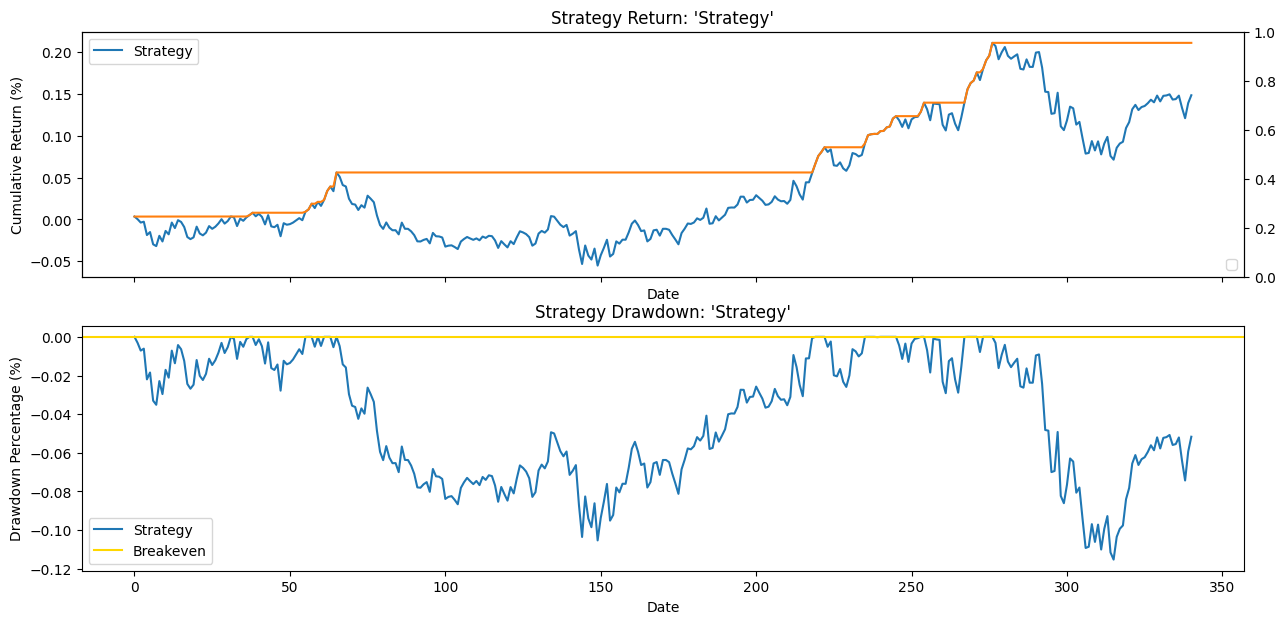

In [48]:
utils.plot(rets=sharpe_weighted_returns[sharpe_weighted_returns != 0.0], reset_index=True)

### Markowitz-Weighted

In [49]:
years = [year for year in range(all_returns.index[0].year, all_returns.index[-1].year)]

In [50]:
markowitz_weighted_positions = []

for i, year in enumerate(years):

    if i == 0:
        weights = all_positions.loc[all_positions.index.year == year].fillna(0.0).div(all_positions.loc[all_positions.index.year == year].sum(axis=1) + 1e-5, axis=0)
    else:
        positions_prev_years = all_positions.loc[all_positions.index.year < year]
        active_positions_prev_years = positions_prev_years.loc[positions_prev_years.sum(axis=1) != 0.0]
        active_tickers_prev_years = active_positions_prev_years.loc[:, active_positions_prev_years.sum(axis=0) != 0]
        strategy_returns_by_ticker_prev_years = all_returns.reindex(index=active_tickers_prev_years.index, columns=active_tickers_prev_years.columns)
        if strategy_returns_by_ticker_prev_years.shape[0] == 0:
            continue
        weights_by_ticker = utils.calculate_markowitz_weights(returns_df=strategy_returns_by_ticker_prev_years)

        positions_this_year = all_positions.loc[all_positions.index.year == year]
        active_positions_this_year = positions_this_year.loc[positions_this_year.sum(axis=1) != 0.0]

        weights = pd.DataFrame(weights_by_ticker, index=active_positions_this_year.index)
        weights = weights.reindex(index=positions_this_year.index, columns=positions_this_year.columns, fill_value=0.0)
    
    markowitz_weighted_positions.append(weights)

markowitz_weighted_positions = pd.concat(markowitz_weighted_positions, axis=0)
markowitz_weighted_positions = markowitz_weighted_positions.reindex(index=all_hodl_returns.index).ffill()
markowitz_weighted_positions_sum = markowitz_weighted_positions.sum(axis=1)
markowitz_weighted_positions.head(5)

,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,SPY
Date,,,,,,,,,,,,
2015-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
markowitz_weighted_returns = (all_hodl_returns * markowitz_weighted_positions).sum(axis=1)
markowitz_weighted_returns.head(5)

Date
2015-01-02    0.0
2015-01-05    0.0
2015-01-06    0.0
2015-01-07    0.0
2015-01-08    0.0
dtype: float64

In [52]:
train_dates = utils.get_training(all_hodl_returns.mean(axis=1)).index.tolist()
valid_dates = utils.get_validation(all_hodl_returns.mean(axis=1)).index.tolist()
test_dates = utils.get_test(all_hodl_returns.mean(axis=1)).index.tolist()

if constants.SPLIT:
    markowitz_weighted_description = pd.concat([
        utils.describe_split(returns=all_hodl_returns.mean(axis=1), daily=True, asset="Equally-weighted").to_frame(name="HODL"),
        utils.describe_split(returns=all_hodl_returns["SPY"], daily=True, asset="SPY").to_frame(name="Market"),
        utils.describe_split(
            returns=markowitz_weighted_returns, pos=markowitz_weighted_positions_sum, daily=True, asset="Risk-weighted",
            train_dates=train_dates, valid_dates=valid_dates, test_dates=test_dates,
        ).to_frame(name="Strategy (Daily)"),
        utils.describe_split(
            returns=utils.get_trade_return(returns=markowitz_weighted_returns, pos=markowitz_weighted_positions_sum), daily=False, asset="Equally-weighted",
            train_dates=train_dates, valid_dates=valid_dates, test_dates=test_dates,
        ).to_frame(name="Strategy (Trade)"),
    ], axis=1)
else:
    markowitz_weighted_description = pd.concat([
        utils.describe(returns=all_hodl_returns.mean(axis=1), daily=True, asset="Equally-weighted").to_frame(name="HODL"),
        utils.describe(returns=all_hodl_returns["SPY"], daily=True, asset="SPY").to_frame(name="Market"),
        utils.describe(
            returns=markowitz_weighted_returns, pos=markowitz_weighted_positions_sum, daily=True, asset="Risk-weighted",
        ).to_frame(name="Strategy (Daily)"),
        utils.describe(
            returns=utils.get_trade_return(returns=markowitz_weighted_returns, pos=markowitz_weighted_positions_sum), daily=False, asset="Equally-weighted"
        ).to_frame(name="Strategy (Trade)"),
    ], axis=1)

markowitz_weighted_description

,HODL,Market,Strategy (Daily),Strategy (Trade)
Asset,Equally-weighted,SPY,Risk-weighted,Equally-weighted
Start,2015-01-02,2015-01-02,2015-01-02,2015-03-02
End,2024-02-15,2024-02-15,2024-02-15,2023-03-01
Mean Return,0.04206%,0.04792%,0.12718%,5.32540%
Total Return,119.51%,142.69%,48.76%,48.76%
Median Return,0.05064%,0.05035%,0.07376%,3.22293%
1st Quartile,-0.32642%,-0.36412%,-0.70477%,0.76029%
3rd Quartile,0.48061%,0.54529%,1.03321%,9.43707%
Std Dev Return,0.84404%,0.94932%,1.46122%,7.65444%
CAGR,3.849 bps,4.341 bps,11.653 bps,508.949 bps


In [53]:
utils.get_statistic(stat_df=markowitz_weighted_description, stat="Mean Return")

,HODL,Market,Strategy (Daily),Strategy (Trade)
Mean Return,0.04206%,0.04792%,0.12718%,5.32540%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


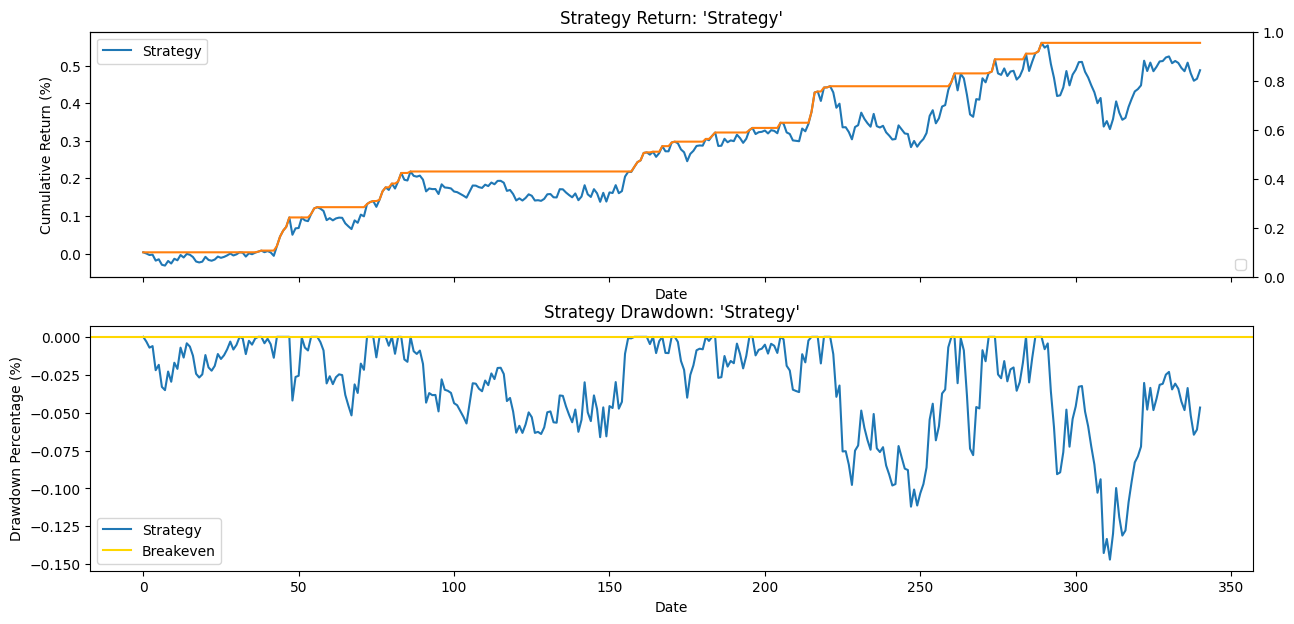

In [54]:
utils.plot(rets=markowitz_weighted_returns[markowitz_weighted_returns != 0.0], reset_index=True)

In [55]:
descriptions = utils.combine_descriptions(
    EW=equal_weighted_description, 
    Risk=risk_weighted_description, 
    Sharpe=sharpe_weighted_description,
    Markowitz=markowitz_weighted_description,
)
descriptions = pd.concat([all_stock_descriptions, descriptions], axis=0)
descriptions

HODL  Strategy (Daily)  \
Type      statistic                                                   
XLC       Asset                               XLC               XLC   
          Start                        2018-06-19        2018-06-19   
          End                          2024-02-15        2024-02-15   
          Mean Return                    0.03359%          0.09633%   
          Total Return                     32.89%            15.89%   
          Median Return                  0.07273%          0.06109%   
          1st Quartile                  -0.69773%         -0.76636%   
          3rd Quartile                   0.77238%          0.90623%   
          Std Dev Return                 1.36553%          1.42530%   
          CAGR                          2.426 bps         8.626 bps   
          Trade CAGR                          N/A            3.755%   
          Ann. CAGR                        6.305%           24.269%   
          Activity Ratio                  100.00%            14.59%   
          Number of Trades                    0.0               4.0   
          Average Hold Period       1,172.00 Days        42.75 Days   
          Daily Sharpe Ratio               0.0246            0.0676   
          Ann. Sharpe Ratio                0.3905            0.4098   
          Daily Sortino Ratio              0.0347            0.1079   
          Ann. Sortino Ratio               0.5501            0.6542   
          Daily Calmar Ratio                0.705            0.8373   
          Hit Ratio                        52.82%            52.05%   
          Profit Factor                     1.07x             1.20x   
          MDD                             -46.65%           -18.97%   
          MDD Start                    2021-09-01        2022-04-04   
          MDD Bottom                   2022-11-03        2023-03-10   
          MDD End                            None              None   
          MDD Decline Duration           297 Days           27 Days   
          MDD Recovery Duration              None              None   
XLY       Asset                               XLY               XLY   
          Start                        2015-01-02        2015-01-02   
          End                          2024-02-15        2024-02-15   
          Mean Return                    0.04505%          0.07641%   
          Total Return                    115.45%            26.50%   
          Median Return                  0.11328%          0.12433%   
          1st Quartile                  -0.52966%         -0.52183%   
          3rd Quartile                   0.67907%          0.70946%   
          Std Dev Return                 1.22134%          1.22179%   
          CAGR                          3.758 bps         6.895 bps   
          Trade CAGR                          N/A            2.982%   
          Ann. CAGR                        9.931%           18.969%   
          Activity Ratio                  100.00%            16.69%   
          Number of Trades                    0.0               8.0   
          Average Hold Period       2,043.00 Days        42.62 Days   
          Daily Sharpe Ratio               0.0369            0.0625   
          Ann. Sharpe Ratio                0.5856            0.4056   
          Daily Sortino Ratio              0.0485            0.0838   
          Ann. Sortino Ratio               0.7699            0.5433   
          Daily Calmar Ratio               2.9104            1.3766   
          Hit Ratio                        54.77%            54.84%   
          Profit Factor                     1.11x             1.19x   
          MDD                             -39.67%           -19.25%   
          MDD Start                    2021-11-19        2022-03-29   
          MDD Bottom                   2022-12-28        2023-03-10   
          MDD End                            None              None   
          MDD Decline Duration           278 Days           31 Days  

In [59]:
statistic = "Total Return"
# statistic = "Activity Ratio"

if constants.SPLIT:
    train_descriptions = descriptions.loc[descriptions.index.get_level_values("set") == "Train"]
    display(utils.get_statistic(stat_df=train_descriptions, stat=statistic).sort_values("Strategy (Daily)"))

    validation_descriptions = descriptions.loc[descriptions.index.get_level_values("set") == "Validation"]
    display(utils.get_statistic(stat_df=validation_descriptions, stat=statistic).sort_values("Strategy (Daily)"))
    
    test_descriptions = descriptions.loc[descriptions.index.get_level_values("set") == "Test"]
    display(utils.get_statistic(stat_df=test_descriptions, stat=statistic).sort_values("Strategy (Daily)"))

else:
    display(utils.get_statistic(stat_df=descriptions, stat=statistic).sort_values("Strategy (Daily)"))

,,HODL,Strategy (Daily),Strategy (Trade),Market
Type,statistic,,,,
XLF,Total Return,140.24%,1.88%,1.88%,NaN
XLI,Total Return,124.56%,11.07%,11.07%,NaN
Sharpe,Total Return,119.51%,14.83%,14.83%,142.69%
XLC,Total Return,32.89%,15.89%,15.89%,NaN
XLV,Total Return,116.32%,16.92%,16.92%,NaN
SPY,Total Return,142.69%,22.47%,22.47%,NaN
XLK,Total Return,288.01%,25.20%,25.20%,NaN
XLY,Total Return,115.45%,26.50%,26.50%,NaN
XLP,Total Return,74.44%,27.53%,27.53%,NaN


## Random Strategy Comparisons

In [48]:
# df_ret = strategy_details["SPY"]["hodl"]

In [49]:
# def create_random_strategy(returns: pd.Series, activity: float = 1.0):

#     rand = pd.Series(np.random.uniform(0, 1, len(returns)), index=returns.index)
#     rand_pos = (rand <= activity).astype(int)

#     rand_strat_returns = returns * rand

#     return {"returns": rand_strat_returns, "pos": rand_pos}
    

In [50]:
# pd.concat([describe(**create_random_strategy(returns=df_ret, activity=0.1309)) for _ in range(10)], axis=1)

In [51]:
# pd.concat([describe(returns=get_trade_return(**create_random_strategy(returns=df_ret, activity=0.1309))) for _ in range(10)], axis=1)